<a href="https://colab.research.google.com/github/SayaliSPotdar/Code_Clouse_Uber_Data_Analysis/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("/content/gdrive/MyDrive/rideshare_kaggle.csv")

In [6]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [8]:
df.drop(columns=['id','timestamp','datetime','surge_multiplier','latitude', 'longitude', 'temperature','apparentTemperature',	'uvIndexTime'	,'temperatureMin'	,'temperatureMinTime'	,'temperatureMax','temperatureMaxTime','apparentTemperatureMin',	'apparentTemperatureMinTime'	,'apparentTemperatureMax'	,'apparentTemperatureMaxTime'],inplace=True)

In [9]:
df.drop(columns=['pressure',	'windBearing','cloudCover','uvIndex',	'visibility.1','ozone','sunriseTime','sunsetTime','moonPhase'],inplace=True)

In [10]:
df.drop(columns=['temperatureHighTime','temperatureLow','temperatureLowTime',	'apparentTemperatureHigh',	'apparentTemperatureHighTime',	'apparentTemperatureLow',	'apparentTemperatureLowTime'],inplace=True)

In [11]:
df.drop(columns=['precipIntensity','dewPoint',	'precipIntensityMax'],inplace=True)

In [12]:
df.drop(columns=['precipProbability',	'humidity',	'windSpeed'	,'windGust'	,'windGustTime'	,'visibility',	'temperatureHigh'],inplace=True)

In [13]:
df.drop(columns=['long_summary'],inplace=True)

In [14]:
df.drop(columns=['product_id','icon'],inplace=True)

In [15]:
df.head(2)

,hour,day,month,timezone,source,destination,cab_type,name,price,distance,short_summary
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,Mostly Cloudy
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,Rain


In [16]:
df.tail(2)

,hour,day,month,timezone,source,destination,cab_type,name,price,distance,short_summary
693069,23,1,12,America/New_York,West End,North End,Uber,Black SUV,27.0,1.0,Partly Cloudy
693070,23,1,12,America/New_York,West End,North End,Uber,UberPool,10.0,1.0,Partly Cloudy


In [17]:
df.shape

(693071, 11)

In [18]:
df.columns

Index(['hour', 'day', 'month', 'timezone', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'short_summary'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hour           693071 non-null  int64  
 1   day            693071 non-null  int64  
 2   month          693071 non-null  int64  
 3   timezone       693071 non-null  object 
 4   source         693071 non-null  object 
 5   destination    693071 non-null  object 
 6   cab_type       693071 non-null  object 
 7   name           693071 non-null  object 
 8   price          637976 non-null  float64
 9   distance       693071 non-null  float64
 10  short_summary  693071 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 58.2+ MB


In [20]:
df.duplicated().sum()

78210

In [21]:
df=df.drop_duplicates()

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(614861, 11)

In [24]:
df['timezone'].value_counts()

America/New_York    614861
Name: timezone, dtype: int64

In [25]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [26]:
df['short_summary'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [27]:
df['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [28]:
df['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [29]:
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [30]:
df.corr()

<ipython-input-30-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,hour,day,month,price,distance
hour,1.000000,0.067821,-0.081326,0.001004,0.002369
day,0.067821,1.000000,-0.858108,0.003259,0.003053
month,-0.081326,-0.858108,1.000000,-0.003693,-0.002484
price,0.001004,0.003259,-0.003693,1.000000,0.349159
distance,0.002369,0.003053,-0.002484,0.349159,1.000000


<ipython-input-31-25d837c6d0b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

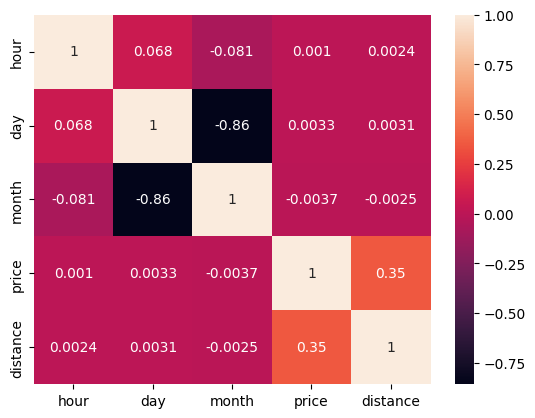

In [31]:
import seaborn as  sns
sns.heatmap(df.corr(),annot=True)

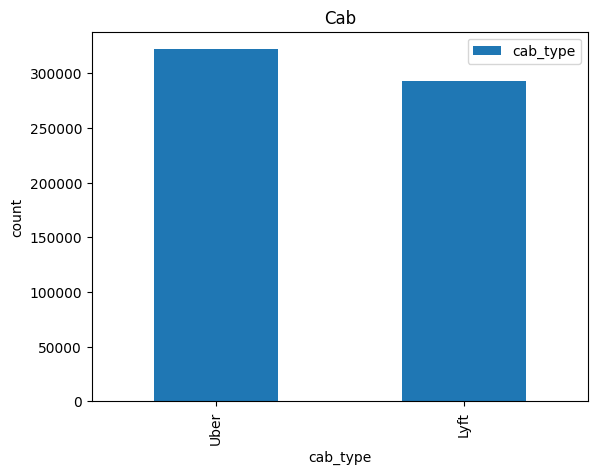

In [32]:
df['cab_type'].value_counts().plot(kind='bar')
plt.title('Cab')
plt.xlabel('cab_type')
plt.ylabel('count')
plt.legend()
plt.show()


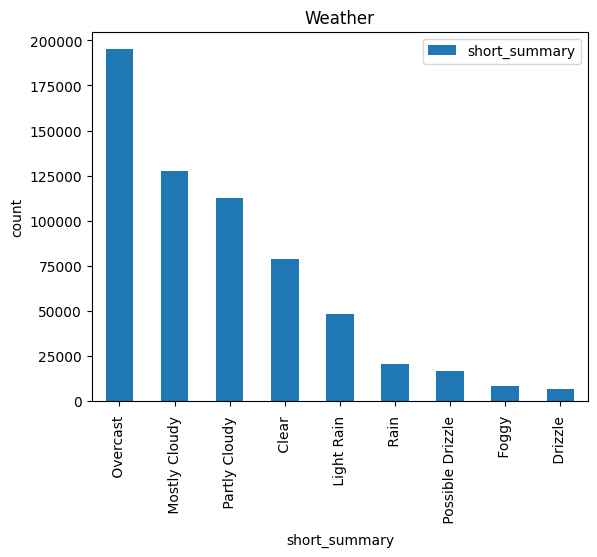

In [33]:
df['short_summary'].value_counts().plot(kind='bar')
plt.title('Weather')
plt.xlabel('short_summary')
plt.ylabel('count')
plt.legend()
plt.show()

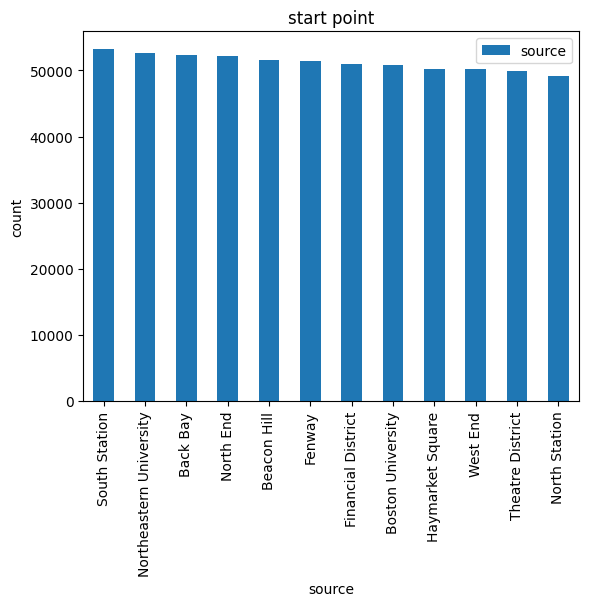

In [34]:
df['source'].value_counts().plot(kind='bar')
plt.title('start point')
plt.xlabel('source')
plt.ylabel('count')
plt.legend()
plt.show()

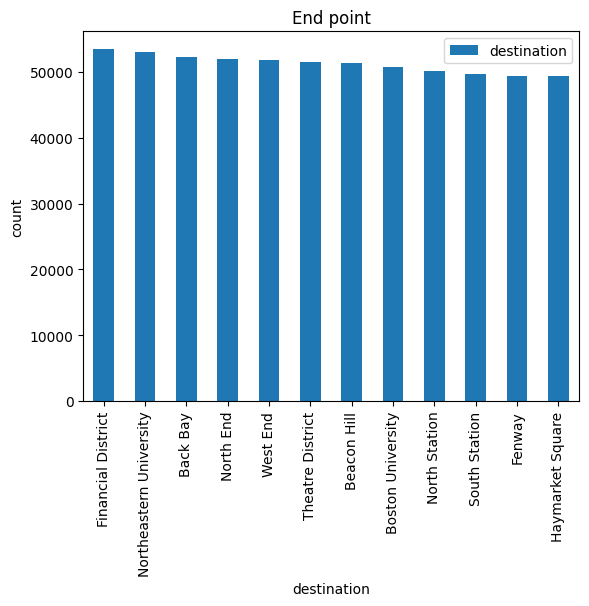

In [35]:
df['destination'].value_counts().plot(kind='bar')
plt.title('End point')
plt.xlabel('destination')
plt.ylabel('count')
plt.legend()
plt.show()

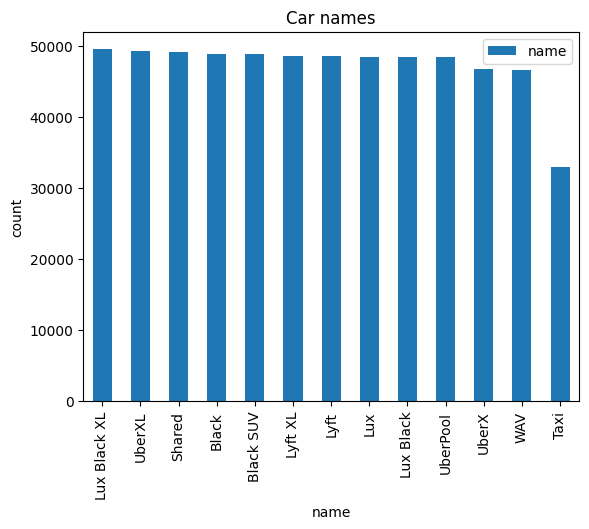

In [36]:
df['name'].value_counts().plot(kind='bar')
plt.title('Car names')
plt.xlabel('name')
plt.ylabel('count')
plt.legend()
plt.show()

In [37]:
df.dropna()

,hour,day,month,timezone,source,destination,cab_type,name,price,distance,short_summary
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,Mostly Cloudy
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,Rain
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,Clear
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,Clear
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,America/New_York,West End,North End,Uber,WAV,9.5,1.00,Partly Cloudy
693066,23,1,12,America/New_York,West End,North End,Uber,UberXL,13.0,1.00,Partly Cloudy
693067,23,1,12,America/New_York,West End,North End,Uber,UberX,9.5,1.00,Partly Cloudy
693069,23,1,12,America/New_York,West End,North End,Uber,Black SUV,27.0,1.00,Partly Cloudy


In [38]:
df.isnull().sum()

hour                 0
day                  0
month                0
timezone             0
source               0
destination          0
cab_type             0
name                 0
price            32942
distance             0
short_summary        0
dtype: int64

In [39]:
df.dropna(subset=['price'], inplace=True)

In [40]:
df.dropna(subset=['timezone'], inplace= True)
df.dropna(subset=['short_summary'],inplace= True)
df.dropna(subset=['cab_type' ], inplace= True)

In [41]:
df.isnull().sum()

hour             0
day              0
month            0
timezone         0
source           0
destination      0
cab_type         0
name             0
price            0
distance         0
short_summary    0
dtype: int64

In [42]:
df['timezone']=df['timezone'].map({'America/New_York':1 }).astype('int')
df['cab_type']=df['cab_type'].map({'Lyft':0, 'Uber':1}).astype('int')
df['short_summary']=df['short_summary'].map({' Mostly Cloudy ':0, ' Rain ':1, ' Clear ':2, ' Partly Cloudy ':3,
       ' Overcast ':4, ' Light Rain ':5, ' Foggy ':6, ' Possible Drizzle ':7,' Drizzle ':8}).astype('int')
df['source']=df['source'].map({'Haymarket Square':0, 'Back Bay':1, 'North End':2, 'North Station':3,
       'Beacon Hill':4, 'Boston University':5, 'Fenway':6, 'South Station':7,'Theatre District':8, 'West End':9, 'Financial District':10,'Northeastern University':11})
df['destination']=df['destination'].map({'North Station':0, 'Northeastern University':1, 'West End':2,
       'Haymarket Square':3, 'South Station':4, 'Fenway':5, 'Theatre District':6,
       'Beacon Hill':7, 'Back Bay':8, 'North End':9, 'Financial District':10,'Boston University':11}).astype('int')
df['name']=df['name'].map({'Shared':0, 'Lux':1, 'Lyft':2, 'Lux Black XL':3, 'Lyft XL':4, 'Lux Black':5,
       'UberXL':6, 'Black':7, 'UberX':8, 'WAV':8, 'Black SUV':9, 'UberPool':10, 'Taxi':11}).astype('int')


In [43]:
df.head(2)

,hour,day,month,timezone,source,destination,cab_type,name,price,distance,short_summary
0,9,16,12,1,0,0,0,0,5.0,0.44,0
1,2,27,11,1,0,0,0,1,11.0,0.44,1


In [44]:
df.tail(2)

,hour,day,month,timezone,source,destination,cab_type,name,price,distance,short_summary
693069,23,1,12,1,9,9,1,9,27.0,1.0,3
693070,23,1,12,1,9,9,1,10,10.0,1.0,3


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X=np.array(df[["hour",	"day",	"month",	"timezone",	"source",	"destination",	"cab_type",	"name",	"distance",	"short_summary"]])
y=np.array(df["price"])

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression()

In [50]:
reg = reg.fit(X_train, y_train)

In [51]:
accuracy = reg.score(X_test,y_test)
print(accuracy*100,'%')

20.68325550072717 %


In [52]:
from sklearn import metrics
y_pred = reg.predict(X_test)

metrics.r2_score(y_pred,y_test)

-2.923715250053498

In [53]:
X_test

array([[16.  , 17.  , 12.  , ...,  3.  ,  0.99,  4.  ],
       [14.  , 29.  , 11.  , ...,  0.  ,  1.07,  3.  ],
       [14.  ,  3.  , 12.  , ...,  8.  ,  2.29,  0.  ],
       ...,
       [20.  , 14.  , 12.  , ...,  5.  ,  3.34,  3.  ],
       [18.  , 16.  , 12.  , ...,  8.  ,  1.16,  4.  ],
       [22.  , 28.  , 11.  , ...,  4.  ,  0.76,  4.  ]])

In [54]:
y_test

array([26. ,  5. ,  9.5, ..., 27.5,  9.5, 10.5])

In [55]:
y_pred

array([14.70621265,  9.94281324, 16.23890046, ..., 24.9023222 ,
       12.88620162, 15.84950204])

In [56]:
reg.predict(X_test)

array([14.70621265,  9.94281324, 16.23890046, ..., 24.9023222 ,
       12.88620162, 15.84950204])

In [57]:
reg.intercept_

7.9671274943618275

In [58]:
reg.coef_

array([-2.29412323e-04, -2.55005487e-03, -9.15338314e-02,  1.80411242e-16,
        4.12468288e-03,  8.30604825e-03, -1.07847454e+01,  1.69109374e+00,
        2.88566096e+00, -1.34555699e-02])